In [1]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-b0417886a268b83a.parquet', 'valid': 'data/valid-00000-of-00001-846411c236133ba3.parquet'}
df_train = pd.read_parquet("hf://datasets/datnth1709/VLSP2016-NER-data/" + splits["train"])
df_valid = pd.read_parquet("hf://datasets/datnth1709/VLSP2016-NER-data/" + splits["valid"])
df = pd.concat([df_train, df_valid]).reset_index(drop=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
tag_id = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-NAT': 7, 'I-NAT': 8}
id_tag = {0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG', 5: 'B-LOC', 6: 'I-LOC', 7: 'B-NAT', 8: 'I-NAT'}

In [3]:
def label(x):
  return [id_tag[int(i)] for i in x]
df["ner_labels"] = df.ner_tags.apply(label)
df

,tokens,ner_tags,ner_labels
0,"[Không_khí, thật, náo_nhiệt, .]","[0, 0, 0, 0]","[O, O, O, O]"
1,"[Chị, Lãnh, và, Xăng, ra, đi, ,, mình, đứng, n...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, B-PER, O, B-PER, O, O, O, O, O, O, O, O, O..."
2,"[Suy_tính, mãi, ,, khóc, mãi, rồi, Phúc, lấy, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, B-PER, O, O, O, O, O, O, O,..."
3,"[Hoà, bảo, hồi, mới, qua, đâu, có, biết, nấu_n...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, B-..."
4,"[Nhật_ký, của, thuyền_viên, .]","[0, 0, 0, 0]","[O, O, O, O]"
...,...,...,...
16853,"[Nghe, thấy, đã, ghê_ghê, nhưng, Nhiêu, chưa, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[O, O, O, O, O, B-PER, O, O, O, O, O, O, O, O,..."
16854,"[Nhưng, mọi, chuyện, không, dừng, ở, đó, .]","[0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O]"
16855,"[Hoà, bảo, thời_gian, đầu, mặc_cảm, lắm, ,, ở,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
16856,"[Biết_bao, người, đã, tình_nguyện, hiến_dâng, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"


# Overview

In [4]:
df.head(5)

,tokens,ner_tags,ner_labels
0,"[Không_khí, thật, náo_nhiệt, .]","[0, 0, 0, 0]","[O, O, O, O]"
1,"[Chị, Lãnh, và, Xăng, ra, đi, ,, mình, đứng, n...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, B-PER, O, B-PER, O, O, O, O, O, O, O, O, O..."
2,"[Suy_tính, mãi, ,, khóc, mãi, rồi, Phúc, lấy, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, B-PER, O, O, O, O, O, O, O,..."
3,"[Hoà, bảo, hồi, mới, qua, đâu, có, biết, nấu_n...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, B-..."
4,"[Nhật_ký, của, thuyền_viên, .]","[0, 0, 0, 0]","[O, O, O, O]"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16858 entries, 0 to 16857
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tokens      16858 non-null  object
 1   ner_tags    16858 non-null  object
 2   ner_labels  16858 non-null  object
dtypes: object(3)
memory usage: 395.2+ KB


In [6]:
print("tokens - ", type(df.tokens[0]))
print("ner_tags - ", type(df.ner_tags[0]))

tokens -  <class 'numpy.ndarray'>
ner_tags -  <class 'numpy.ndarray'>


In [7]:
# Hàm gộp và xử lý dấu câu
def join_tokens(tokens):
    text = ' '.join(tokens)
    return text

def reform_raw_text(tokens):
    text = ' '.join(tokens)
    return text.replace("_", " ")

df['text_withseg'] = df['tokens'].apply(join_tokens)
df['text_raw'] = df['tokens'].apply(reform_raw_text)

def label(x):
  return [id_tag[int(i)] for i in x]
df["ner_labels"] = df.ner_tags.apply(label)
df

,tokens,ner_tags,ner_labels,text_withseg,text_raw
0,"[Không_khí, thật, náo_nhiệt, .]","[0, 0, 0, 0]","[O, O, O, O]",Không_khí thật náo_nhiệt .,Không khí thật náo nhiệt .
1,"[Chị, Lãnh, và, Xăng, ra, đi, ,, mình, đứng, n...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, B-PER, O, B-PER, O, O, O, O, O, O, O, O, O...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch..."
2,"[Suy_tính, mãi, ,, khóc, mãi, rồi, Phúc, lấy, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, B-PER, O, O, O, O, O, O, O,...","Suy_tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ...","Suy tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ..."
3,"[Hoà, bảo, hồi, mới, qua, đâu, có, biết, nấu_n...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, B-...","Hoà bảo hồi mới qua đâu có biết nấu_nướng gì ,...","Hoà bảo hồi mới qua đâu có biết nấu nướng gì ,..."
4,"[Nhật_ký, của, thuyền_viên, .]","[0, 0, 0, 0]","[O, O, O, O]",Nhật_ký của thuyền_viên .,Nhật ký của thuyền viên .
...,...,...,...,...,...
16853,"[Nghe, thấy, đã, ghê_ghê, nhưng, Nhiêu, chưa, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[O, O, O, O, O, B-PER, O, O, O, O, O, O, O, O,...",Nghe thấy đã ghê_ghê nhưng Nhiêu chưa được tườ...,Nghe thấy đã ghê ghê nhưng Nhiêu chưa được tườ...
16854,"[Nhưng, mọi, chuyện, không, dừng, ở, đó, .]","[0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O]",Nhưng mọi chuyện không dừng ở đó .,Nhưng mọi chuyện không dừng ở đó .
16855,"[Hoà, bảo, thời_gian, đầu, mặc_cảm, lắm, ,, ở,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","Hoà bảo thời_gian đầu mặc_cảm lắm , ở trong nh...","Hoà bảo thời gian đầu mặc cảm lắm , ở trong nh..."
16856,"[Biết_bao, người, đã, tình_nguyện, hiến_dâng, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",Biết_bao người đã tình_nguyện hiến_dâng cả cuộ...,Biết bao người đã tình nguyện hiến dâng cả cuộ...


In [8]:
time = 0
org_idx = []
token = []
tag = []
for i in (df.index):
  for a in range(len(df.ner_tags[i])):
    # if df.ner_tags[i][a] == 6 or df.ner_tags[i][a] == 5:
    if df.ner_labels[i][a] != 'O':
      token.append(df.tokens[i][[a]])
      tag.append(df.ner_labels[i][a])
      org_idx.append(i)

In [9]:
tag_data = pd.DataFrame({'org_idx': org_idx, 'token': token, 'tag': tag})
tag_data.tag.value_counts()

,count
tag,
B-PER,7479
B-LOC,6244
I-PER,3522
I-LOC,2783
I-ORG,2055
B-ORG,1212
B-NAT,282
I-NAT,279


In [10]:
tag_data[tag_data.tag == 'B-PER'].sample(10)

,org_idx,token,tag
11323,8102,[Rơ],B-PER
19936,14208,[Thạc],B-PER
5074,3612,[Khánh],B-PER
8870,6383,[Bibi],B-PER
5927,4246,[Thuỳ],B-PER
17122,12272,[Chương],B-PER
3236,2290,[Claudia],B-PER
16903,12150,[Chương],B-PER
1953,1364,[Thạc],B-PER
21888,15557,[Đợi],B-PER


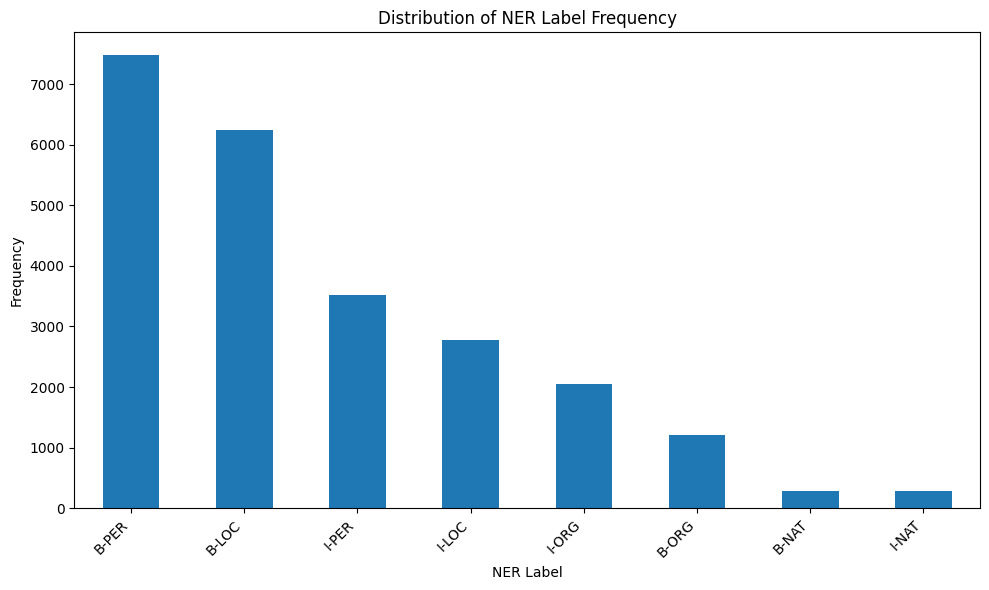

In [11]:
import matplotlib.pyplot as plt

tag_counts = tag_data.tag.value_counts()

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Distribution of NER Label Frequency')
plt.xlabel('NER Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Nhãn B-PER có tần suất cao nhất, vượt quá 7.000.

Nhãn B-LOC đứng thứ hai với khoảng 6.000 lần xuất hiện.

Các nhãn I-PER, I-LOC, và I-ORG có tần suất giảm dần, lần lượt khoảng 4.000, 3000, và 2.000.

Nhãn B-ORG và B-NAT có tần suất thấp hơn, dưới 1.000.

Nhãn I-NAT có tần suất rất thấp.

Vấn đề:


*   Lệch dữ liệu (Data Imbalance): Mô hình có thể thiên về dự đoán các nhãn phổ biến (như B-PER, B-LOC), dẫn đến hiệu suất kém với các nhãn hiếm (như I-NAT, B-NAT).

*   Khó khăn trong học tập: Các nhãn có tần suất thấp có thể không cung cấp đủ thông tin để mô hình học tốt, làm giảm độ chính xác tổng thể.



*   Cần kỹ thuật cân bằng: Có thể cần áp dụng các phương pháp như oversampling cho nhãn hiếm, undersampling cho nhãn phổ biến, hoặc sử dụng các hàm mất mát có trọng số (weighted loss) để cải thiện hiệu suất. (Khó nha bro
)








### Thay đổi các chunking chứa NAT bằng O

In [12]:
tag_data[tag_data.tag == 'B-NAT'].sample(10)

,org_idx,token,tag
3154,2236,[tiếng],B-NAT
4887,3419,[VN],B-NAT
419,269,[Người],B-NAT
2548,1821,[người],B-NAT
993,678,[người],B-NAT
13032,9305,[Mỹ],B-NAT
13183,9436,[tiếng],B-NAT
14119,10184,[tiếng],B-NAT
942,640,[người],B-NAT
14846,10741,[người],B-NAT


In [13]:
def replace_label_in_dataset(target, x):
  new_labels = []
  # print(x)
  i = 0
  while i < len(x):
    if id_tag[x[i]] == target:
      # Find the end of the entity
      j = i
      while j < len(x) and (id_tag[x[j]] == target or id_tag[x[j]] == target.replace('B-', 'I-')):
        j += 1
      # Replace all tags in this entity with 'O' (id 0)
      for k in range(i, j):
        new_labels.append(0)
      i = j # Move to the end of the entity
    else:
      new_labels.append(x[i])
      i += 1
  return new_labels

df['ner_tags_replaced_nat'] = df.ner_tags.apply(lambda x: replace_label_in_dataset('B-NAT', x))
df['ner_labels_replaced_nat'] = df.ner_tags_replaced_nat.apply(label)

# Verify the change
time = 0
org_idx_replaced = []
token_replaced = []
tag_replaced = []
for i in (df.index):
  for a in range(len(df.ner_tags_replaced_nat[i])):
    if df.ner_labels_replaced_nat[i][a] != 'O':
      token_replaced.append(df.tokens[i][[a]])
      tag_replaced.append(df.ner_labels_replaced_nat[i][a])
      org_idx_replaced.append(i)

tag_data_replaced = pd.DataFrame({'org_idx': org_idx_replaced, 'token': token_replaced, 'tag': tag_replaced})

print("Tag counts before replacement:")
print(tag_data.tag.value_counts())
print("\nTag counts after replacing NAT with O:")
print(tag_data_replaced.tag.value_counts())

Tag counts before replacement:
tag
B-PER    7479
B-LOC    6244
I-PER    3522
I-LOC    2783
I-ORG    2055
B-ORG    1212
B-NAT     282
I-NAT     279
Name: count, dtype: int64

Tag counts after replacing NAT with O:
tag
B-PER    7479
B-LOC    6244
I-PER    3522
I-LOC    2783
I-ORG    2055
B-ORG    1212
Name: count, dtype: int64


In [14]:
print("\nUnique values in ner_labels_replaced_nat:")
all_labels_replaced = [label for sublist in df['ner_labels_replaced_nat'] for label in sublist]
print(pd.Series(all_labels_replaced).value_counts())



Unique values in ner_labels_replaced_nat:
O        346105
B-PER      7479
B-LOC      6244
I-PER      3522
I-LOC      2783
I-ORG      2055
B-ORG      1212
Name: count, dtype: int64


### After process

In [15]:
df[40:80]

,tokens,ner_tags,ner_labels,text_withseg,text_raw,ner_tags_replaced_nat,ner_labels_replaced_nat
40,"[Nguyên, phân_công, anh, bạn, đồng_nghiệp, ở, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Nguyên phân_công anh bạn đồng_nghiệp ở vòng ng...,Nguyên phân công anh bạn đồng nghiệp ở vòng ng...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
41,"[Theo, kế_hoạch, ,, những, ngày, đầu, cả, hai,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, B-NAT, I-NAT, O, O...","Theo kế_hoạch , những ngày đầu cả hai luyện ti...","Theo kế hoạch , những ngày đầu cả hai luyện ti...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
42,"[Thật, đáng, tiếc, biết_bao, ,, những, ngày, n...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","Thật đáng tiếc biết_bao , những ngày này trăng...","Thật đáng tiếc biết bao , những ngày này trăng...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
43,"[Hải, và, bố_mẹ, ngày, trước, ở, chung, với, ô...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, B-LOC, I-LO...",Hải và bố_mẹ ngày trước ở chung với ông_bà trê...,Hải và bố mẹ ngày trước ở chung với ông bà trê...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, B-LOC, I-LO..."
44,"[Cho_nên, phương_án, của, ông, Phong, là, “, b...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, B-PER, O, O, O, O, O, O, O, O, O,...",Cho_nên phương_án của ông Phong là “ bán cả co...,Cho nên phương án của ông Phong là “ bán cả co...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, B-PER, O, O, O, O, O, O, O, O, O,..."
45,"[Một, thời_gian, ngắn, sau, trận, tỉ_thí, lịch...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, B-PER, I-PER, O, O, O...","Một thời_gian ngắn sau trận tỉ_thí lịch_sử , M...","Một thời gian ngắn sau trận tỉ thí lịch sử , M...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, B-PER, I-PER, O, O, O..."
46,"[Kao, chỉ, mới, được, gửi, lên, đây, hơn, một,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","Kao chỉ mới được gửi lên đây hơn một tuần , nh...","Kao chỉ mới được gửi lên đây hơn một tuần , nh...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
47,"[An_Lư, cũng, tích_cực, đào_tạo, các, thuyền_v...","[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-LOC, O, O, O, O, O, O, O, O, O, O, O, O, O,...",An_Lư cũng tích_cực đào_tạo các thuyền_viên ng...,An Lư cũng tích cực đào tạo các thuyền viên ng...,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-LOC, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
48,"[Anh, cười, tươi, :, "", Nếu, không, thắng, thì...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","Anh cười tươi : "" Nếu không thắng thì đâu còn ...","Anh cười tươi : "" Nếu không thắng thì đâu còn ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
49,"[Hắn, không, có, một, dữ_liệu, nào, nằm, trong...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",Hắn không có một dữ_liệu nào nằm trong tay thá...,Hắn không có một dữ liệu nào nằm trong tay thá...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [16]:
df = df.drop(columns=['ner_tags','ner_labels'])


In [17]:
df.rename(columns={'ner_tags_replaced_nat': 'ner_tags', 'ner_labels_replaced_nat': 'ner_labels'}, inplace=True)

In [18]:
df[41:50]

,tokens,text_withseg,text_raw,ner_tags,ner_labels
41,"[Theo, kế_hoạch, ,, những, ngày, đầu, cả, hai,...","Theo kế_hoạch , những ngày đầu cả hai luyện ti...","Theo kế hoạch , những ngày đầu cả hai luyện ti...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
42,"[Thật, đáng, tiếc, biết_bao, ,, những, ngày, n...","Thật đáng tiếc biết_bao , những ngày này trăng...","Thật đáng tiếc biết bao , những ngày này trăng...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
43,"[Hải, và, bố_mẹ, ngày, trước, ở, chung, với, ô...",Hải và bố_mẹ ngày trước ở chung với ông_bà trê...,Hải và bố mẹ ngày trước ở chung với ông bà trê...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, B-LOC, I-LO..."
44,"[Cho_nên, phương_án, của, ông, Phong, là, “, b...",Cho_nên phương_án của ông Phong là “ bán cả co...,Cho nên phương án của ông Phong là “ bán cả co...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, B-PER, O, O, O, O, O, O, O, O, O,..."
45,"[Một, thời_gian, ngắn, sau, trận, tỉ_thí, lịch...","Một thời_gian ngắn sau trận tỉ_thí lịch_sử , M...","Một thời gian ngắn sau trận tỉ thí lịch sử , M...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, B-PER, I-PER, O, O, O..."
46,"[Kao, chỉ, mới, được, gửi, lên, đây, hơn, một,...","Kao chỉ mới được gửi lên đây hơn một tuần , nh...","Kao chỉ mới được gửi lên đây hơn một tuần , nh...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
47,"[An_Lư, cũng, tích_cực, đào_tạo, các, thuyền_v...",An_Lư cũng tích_cực đào_tạo các thuyền_viên ng...,An Lư cũng tích cực đào tạo các thuyền viên ng...,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-LOC, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
48,"[Anh, cười, tươi, :, "", Nếu, không, thắng, thì...","Anh cười tươi : "" Nếu không thắng thì đâu còn ...","Anh cười tươi : "" Nếu không thắng thì đâu còn ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
49,"[Hắn, không, có, một, dữ_liệu, nào, nằm, trong...",Hắn không có một dữ_liệu nào nằm trong tay thá...,Hắn không có một dữ liệu nào nằm trong tay thá...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [19]:
time = 0
org_idx = []
token = []
tag = []
for i in (df.index):
  for a in range(len(df.ner_tags[i])):
    # if df.ner_tags[i][a] == 6 or df.ner_tags[i][a] == 5:
    if df.ner_labels[i][a] != 'O':
      token.append(df.tokens[i][[a]])
      tag.append(df.ner_labels[i][a])
      org_idx.append(i)

In [20]:
tag_data = pd.DataFrame({'org_idx': org_idx, 'token': token, 'tag': tag})
tag_data.tag.value_counts()

,count
tag,
B-PER,7479
B-LOC,6244
I-PER,3522
I-LOC,2783
I-ORG,2055
B-ORG,1212


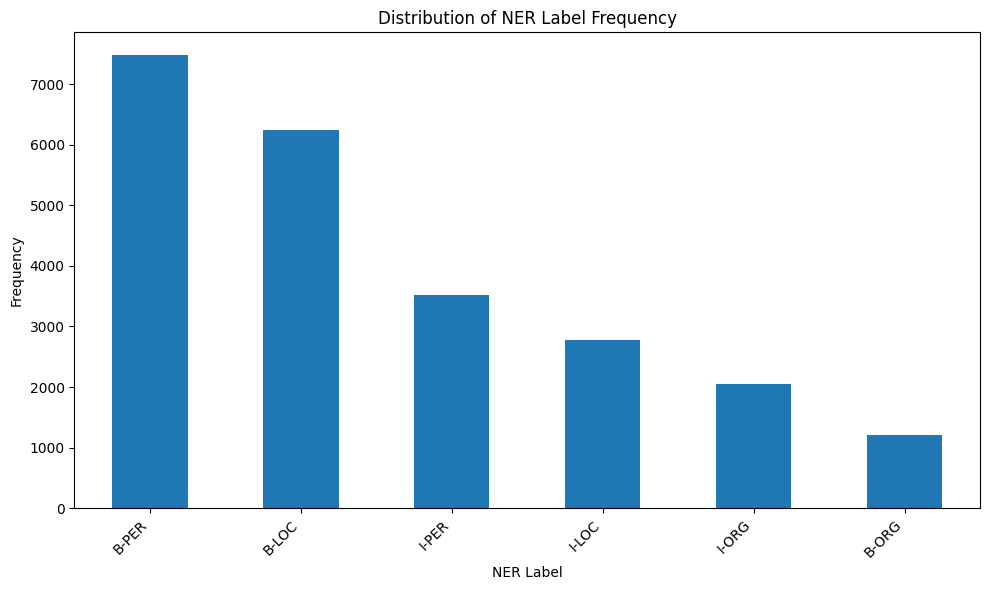

In [21]:
import matplotlib.pyplot as plt

tag_counts = tag_data.tag.value_counts()

plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title('Distribution of NER Label Frequency')
plt.xlabel('NER Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## NOTE


1.   Phân bố độ dài câu
2.   



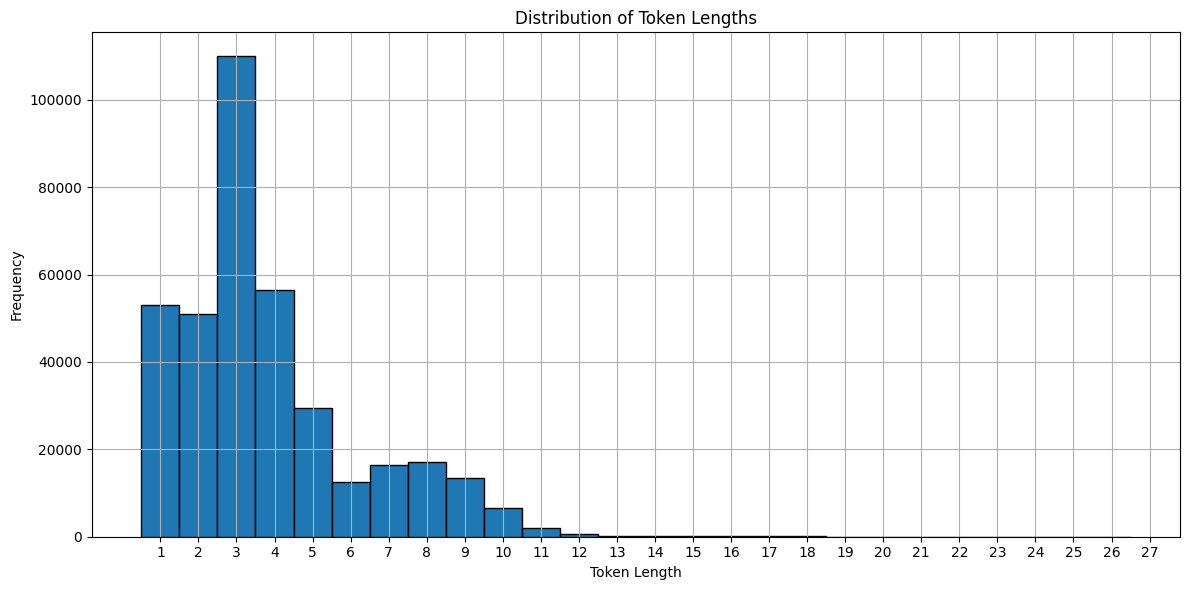

In [22]:
df['token_lengths'] = df['tokens'].apply(lambda token_list: [len(token) for token in token_list])

# Flatten the list of token lengths for all rows
all_token_lengths = [length for sublist in df['token_lengths'] for length in sublist]

# Convert to a pandas Series to easily get the distribution
token_length_series = pd.Series(all_token_lengths)

# Plot the distribution of token lengths
plt.figure(figsize=(12, 6))
token_length_series.hist(bins=range(min(token_length_series), max(token_length_series) + 1), edgecolor='black', align='left')
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.xticks(range(min(token_length_series), max(token_length_series) + 1))
plt.tight_layout()
plt.show()


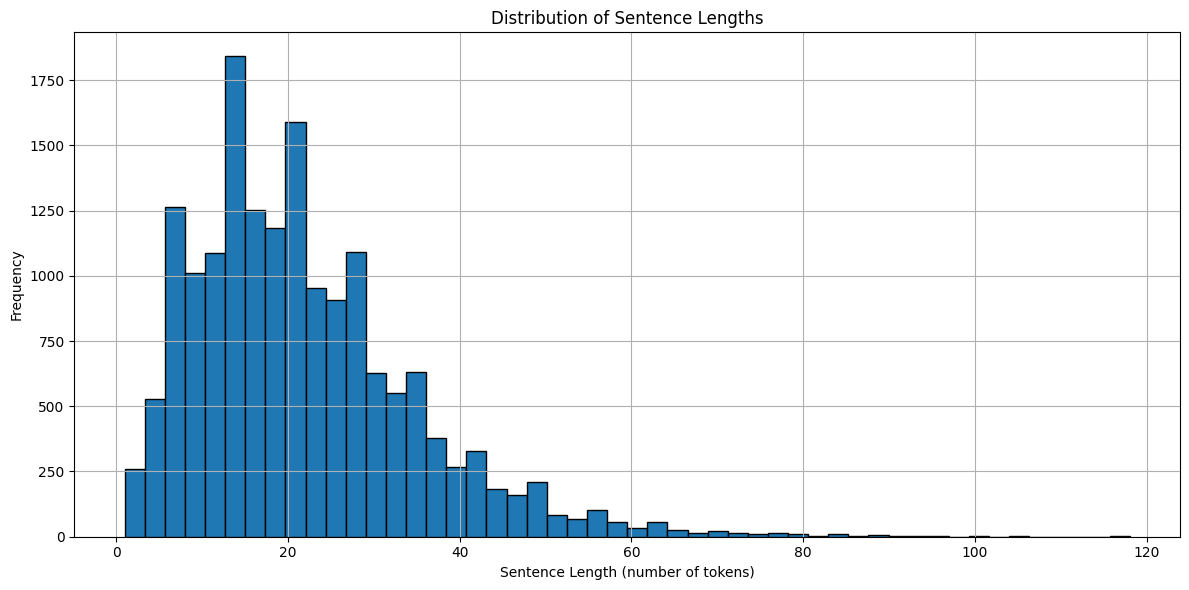


Descriptive statistics for sentence lengths:
count    16858.000000
mean        21.912445
std         12.940344
min          1.000000
25%         13.000000
50%         20.000000
75%         29.000000
max        118.000000
Name: sentence_length, dtype: float64


In [23]:
import matplotlib.pyplot as plt
df['sentence_length'] = df['tokens'].apply(len)

plt.figure(figsize=(12, 6))
df['sentence_length'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (number of tokens)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nDescriptive statistics for sentence lengths:")
print(df['sentence_length'].describe())

In [24]:
df

,tokens,text_withseg,text_raw,ner_tags,ner_labels,token_lengths,sentence_length
0,"[Không_khí, thật, náo_nhiệt, .]",Không_khí thật náo_nhiệt .,Không khí thật náo nhiệt .,"[0, 0, 0, 0]","[O, O, O, O]","[9, 4, 9, 1]",4
1,"[Chị, Lãnh, và, Xăng, ra, đi, ,, mình, đứng, n...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, B-PER, O, B-PER, O, O, O, O, O, O, O, O, O...","[3, 4, 2, 4, 2, 2, 1, 4, 4, 4, 3, 3, 4, 3, 4, ...",31
2,"[Suy_tính, mãi, ,, khóc, mãi, rồi, Phúc, lấy, ...","Suy_tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ...","Suy tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, B-PER, O, O, O, O, O, O, O,...","[8, 3, 1, 4, 3, 3, 4, 3, 2, 2, 4, 1, 3, 3, 1, ...",33
3,"[Hoà, bảo, hồi, mới, qua, đâu, có, biết, nấu_n...","Hoà bảo hồi mới qua đâu có biết nấu_nướng gì ,...","Hoà bảo hồi mới qua đâu có biết nấu nướng gì ,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, B-...","[3, 3, 3, 3, 3, 3, 2, 4, 9, 2, 1, 3, 3, 3, 3, ...",43
4,"[Nhật_ký, của, thuyền_viên, .]",Nhật_ký của thuyền_viên .,Nhật ký của thuyền viên .,"[0, 0, 0, 0]","[O, O, O, O]","[7, 3, 11, 1]",4
...,...,...,...,...,...,...,...
16853,"[Nghe, thấy, đã, ghê_ghê, nhưng, Nhiêu, chưa, ...",Nghe thấy đã ghê_ghê nhưng Nhiêu chưa được tườ...,Nghe thấy đã ghê ghê nhưng Nhiêu chưa được tườ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[O, O, O, O, O, B-PER, O, O, O, O, O, O, O, O,...","[4, 4, 2, 7, 5, 5, 4, 4, 5, 1, 3, 3, 3, 4, 5, ...",21
16854,"[Nhưng, mọi, chuyện, không, dừng, ở, đó, .]",Nhưng mọi chuyện không dừng ở đó .,Nhưng mọi chuyện không dừng ở đó .,"[0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O]","[5, 3, 6, 5, 4, 1, 2, 1]",8
16855,"[Hoà, bảo, thời_gian, đầu, mặc_cảm, lắm, ,, ở,...","Hoà bảo thời_gian đầu mặc_cảm lắm , ở trong nh...","Hoà bảo thời gian đầu mặc cảm lắm , ở trong nh...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[3, 3, 9, 3, 7, 3, 1, 1, 5, 3, 8, 2, 5, 4, 3, ...",29
16856,"[Biết_bao, người, đã, tình_nguyện, hiến_dâng, ...",Biết_bao người đã tình_nguyện hiến_dâng cả cuộ...,Biết bao người đã tình nguyện hiến dâng cả cuộ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[8, 5, 2, 11, 9, 2, 8, 4, 2, 3, 3, 7, 1, 5, 1]",15


In [25]:
times = 1
for i, row in df.iterrows():
  token = row['tokens']
  for j in token:
    print(j)
  times -= 1
  if times == 0:
    break

Không_khí
thật
náo_nhiệt
.


Bởi vì anh bạn nigga của tôi đã thiếu hướng dẫn sử dụng nên tôi sẽ bổ sung

### Cài đặt java (Bắt buộc)

In [26]:
!apt-get install -y openjdk-11-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.27+6~us1-0ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


#### Cài đặt model

In [27]:
pip install py_vncorenlp

###### Tạo thư mục và tải xuống mô hình

In [28]:
from transformers import AutoModel, AutoTokenizer


phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [29]:
# prompt: Code an encoder that encode each row of the tokens from df then append those token that have just been encode to a new column name encoded

def encode_tokens(tokens_list):
    # Join tokens into a single string, assuming they are pre-segmented
    processed_text = " ".join(tokens_list)
    # Encode the sentence and returns a list of token IDs
    encoded_ids = tokenizer.encode(processed_text, add_special_tokens=False) # Avoid adding special tokens twice if tokens already include them
    return encoded_ids

df['encoded'] = df['tokens'].apply(encode_tokens)

print("\nDataFrame with 'encoded' column:")
print(df['encoded'].iloc[0])
print("\nLength of encoded tokens (should be similar to original token count, plus/minus special tokens if not removed):")
print(df['encoded'].apply(len).head())


DataFrame with 'encoded' column:
[10591, 520, 13648, 5]

Length of encoded tokens (should be similar to original token count, plus/minus special tokens if not removed):
0     4
1    31
2    34
3    43
4     4
Name: encoded, dtype: int64


In [30]:
df

,tokens,text_withseg,text_raw,ner_tags,ner_labels,token_lengths,sentence_length,encoded
0,"[Không_khí, thật, náo_nhiệt, .]",Không_khí thật náo_nhiệt .,Không khí thật náo nhiệt .,"[0, 0, 0, 0]","[O, O, O, O]","[9, 4, 9, 1]",4,"[10591, 520, 13648, 5]"
1,"[Chị, Lãnh, và, Xăng, ra, đi, ,, mình, đứng, n...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch...","Chị Lãnh và Xăng ra đi , mình đứng nhìn hai ch...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, B-PER, O, B-PER, O, O, O, O, O, O, O, O, O...","[3, 4, 2, 4, 2, 2, 1, 4, 4, 4, 3, 3, 4, 3, 4, ...",31,"[1108, 19703, 6, 28163, 40, 57, 4, 68, 414, 36..."
2,"[Suy_tính, mãi, ,, khóc, mãi, rồi, Phúc, lấy, ...","Suy_tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ...","Suy tính mãi , khóc mãi rồi Phúc lấy ra tờ giấ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O, O, O, O, O, O, B-PER, O, O, O, O, O, O, O,...","[8, 3, 1, 4, 3, 3, 4, 3, 2, 2, 4, 1, 3, 3, 1, ...",33,"[39659, 30554, 1997, 4, 1521, 1997, 182, 2777,..."
3,"[Hoà, bảo, hồi, mới, qua, đâu, có, biết, nấu_n...","Hoà bảo hồi mới qua đâu có biết nấu_nướng gì ,...","Hoà bảo hồi mới qua đâu có biết nấu nướng gì ,...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, B-...","[3, 3, 3, 3, 3, 3, 2, 4, 9, 2, 1, 3, 3, 3, 3, ...",43,"[2042, 1218, 857, 60, 89, 602, 10, 55, 9880, 1..."
4,"[Nhật_ký, của, thuyền_viên, .]",Nhật_ký của thuyền_viên .,Nhật ký của thuyền viên .,"[0, 0, 0, 0]","[O, O, O, O]","[7, 3, 11, 1]",4,"[17188, 7, 6494, 5]"
...,...,...,...,...,...,...,...,...
16853,"[Nghe, thấy, đã, ghê_ghê, nhưng, Nhiêu, chưa, ...",Nghe thấy đã ghê_ghê nhưng Nhiêu chưa được tườ...,Nghe thấy đã ghê ghê nhưng Nhiêu chưa được tườ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[O, O, O, O, O, B-PER, O, O, O, O, O, O, O, O,...","[4, 4, 2, 7, 5, 5, 4, 4, 5, 1, 3, 3, 3, 4, 5, ...",21,"[3656, 108, 14, 3, 17143, 51, 24733, 102, 11, ..."
16854,"[Nhưng, mọi, chuyện, không, dừng, ở, đó, .]",Nhưng mọi chuyện không dừng ở đó .,Nhưng mọi chuyện không dừng ở đó .,"[0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O]","[5, 3, 6, 5, 4, 1, 2, 1]",8,"[293, 207, 344, 17, 772, 25, 37, 5]"
16855,"[Hoà, bảo, thời_gian, đầu, mặc_cảm, lắm, ,, ở,...","Hoà bảo thời_gian đầu mặc_cảm lắm , ở trong nh...","Hoà bảo thời gian đầu mặc cảm lắm , ở trong nh...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[3, 3, 9, 3, 7, 3, 1, 1, 5, 3, 8, 2, 5, 4, 3, ...",29,"[2042, 1218, 130, 127, 11878, 957, 4, 25, 12, ..."
16856,"[Biết_bao, người, đã, tình_nguyện, hiến_dâng, ...",Biết_bao người đã tình_nguyện hiến_dâng cả cuộ...,Biết bao người đã tình nguyện hiến dâng cả cuộ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[8, 5, 2, 11, 9, 2, 8, 4, 2, 3, 3, 7, 1, 5, 1]",15,"[53464, 18, 14, 4047, 46883, 94, 1679, 68, 90,..."


In [31]:
# Machine Learning imports for Random Forest NER
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [39]:
# CELL 2: PhoBERT Feature Extraction Function
# ============================================

def extract_phobert_token_features(token, label, token_id, position, sentence_length, prev_token, next_token, tokenizer):
    """
    CORE FEATURE EXTRACTION: Create rich feature vector for each token

    This function creates a 40-dimensional feature vector combining:
    1. Basic word characteristics (8 features)
    2. PhoBERT tokenizer information (4 features)
    3. Vietnamese-specific patterns (10 features)
    4. Position and context information (4 features)
    5. Previous token context (4 features)
    6. Next token context (4 features)
    7. Character-level patterns (6 features)

    Total: 40 features per token
    """
    features = []

    # ==========================================
    # 1. BASIC WORD FEATURES (8 features)
    # ==========================================
    # These capture fundamental word characteristics
    features.extend([
        token.istitle(),              # Feature 1: Is first letter capitalized? (Important for proper nouns)
        token.islower(),              # Feature 2: Is all lowercase? (Common words)
        token.isupper(),              # Feature 3: Is all uppercase? (Acronyms, emphasis)
        token.isdigit(),              # Feature 4: Is purely numeric? (Dates, quantities)
        token.isalpha(),              # Feature 5: Contains only letters? (Pure words)
        len(token),                   # Feature 6: Word length (longer words often entities)
        len(token) > 5,               # Feature 7: Is long word? (Complex entities)
        len(token) < 3,               # Feature 8: Is short word? (Articles, prepositions)
    ])

    # ==========================================
    # 2. PHOBERT TOKENIZER FEATURES (4 features)
    # ==========================================
    # These leverage PhoBERT's semantic understanding
    features.extend([
        token_id,                     # Feature 9: PhoBERT token ID (semantic representation)
        token_id % 1000,             # Feature 10: Token ID modulo (clustering similar semantics)
        token_id // 1000,            # Feature 11: Token ID division (high-level semantic groups)
        len(tokenizer.tokenize(token)), # Feature 12: Number of sub-tokens (complexity measure)
    ])

    # ==========================================
    # 3. VIETNAMESE-SPECIFIC FEATURES (10 features)
    # ==========================================
    # These capture Vietnamese naming and geographic patterns
    features.extend([
        # Common Vietnamese surnames and name patterns
        token.startswith('Ng'),       # Feature 13: Nguyễn, Ng (most common Vietnamese surname)
        token.startswith('Tr'),       # Feature 14: Trần, Trương (common Vietnamese surnames)
        token.startswith('Lê'),       # Feature 15: Lê (common Vietnamese surname)
        token.startswith('Phạm'),     # Feature 16: Phạm (common Vietnamese surname)
        token.startswith('Vũ'),
        token.startswith('Phan'),
        token.startswith('Trương'),
        token.startswith('Bùi'),
        token.startswith('Đặng'),


        # Vietnamese geographic patterns
        token.endswith('nh'),         # Feature 17: Hành, Thành (place suffixes)
        token.endswith('ại'),         # Feature 18: Hải, Lại (place suffixes)
        token.endswith('ương'),       # Feature 19: Hương, Thương (place suffixes)

        # Vietnamese location indicators
        'Thành' in token,            # Feature 20: City indicator (Thành phố)
        'phố' in token.lower(),      # Feature 21: City/street indicator
        'tỉnh' in token.lower(),     # Feature 22: Province indicator
        'quận' in token.lower(),
        'huyện' in token.lower(),
        'xã' in token.lower(),
    ])

    # ==========================================
    # 4. POSITION AND CONTEXT FEATURES (4 features)
    # ==========================================
    # These capture positional information in sentences
    features.extend([
        position,                     # Feature 23: Absolute position in sentence
        position / sentence_length,   # Feature 24: Relative position (0.0 to 1.0)
        position == 0,               # Feature 25: Is first word? (Often capitalized)
        position == sentence_length - 1, # Feature 26: Is last word? (Punctuation effects)
    ])

    # ==========================================
    # 5. PREVIOUS TOKEN CONTEXT (4 features)
    # ==========================================
    # These capture left context for entity boundary detection
    if prev_token:
        prev_token_ids = tokenizer.encode(prev_token, add_special_tokens=False)
        prev_token_id = prev_token_ids[0] if prev_token_ids else 0
        features.extend([
            prev_token.istitle(),     # Feature 27: Previous word capitalized?
            prev_token.islower(),     # Feature 28: Previous word lowercase?
            prev_token_id % 1000,     # Feature 29: Previous token semantic cluster
            len(prev_token),          # Feature 30: Previous word length
        ])
    else:
        # Padding for beginning of sentence
        features.extend([False, False, 0, 0])

    # ==========================================
    # 6. NEXT TOKEN CONTEXT (4 features)
    # ==========================================
    # These capture right context for entity boundary detection
    if next_token:
        next_token_ids = tokenizer.encode(next_token, add_special_tokens=False)
        next_token_id = next_token_ids[0] if next_token_ids else 0
        features.extend([
            next_token.istitle(),     # Feature 31: Next word capitalized?
            next_token.islower(),     # Feature 32: Next word lowercase?
            next_token_id % 1000,     # Feature 33: Next token semantic cluster
            len(next_token),          # Feature 34: Next word length
        ])
    else:
        # Padding for end of sentence
        features.extend([False, False, 0, 0])

    # ==========================================
    # 7. CHARACTER-LEVEL PATTERNS (6 features)
    # ==========================================
    # These capture fine-grained character patterns
    features.extend([
        any(char.isdigit() for char in token),  # Feature 35: Contains any digits?
        '-' in token,                           # Feature 36: Contains hyphen? (compound words)
        '.' in token,                           # Feature 37: Contains period? (abbreviations)
        ',' in token,                           # Feature 38: Contains comma? (lists)
        token.count('_'),                       # Feature 39: Underscore count (technical terms)
        token.isnumeric(),                      # Feature 40: Fully numeric?
    ])

    # Convert to numpy array with float type for sklearn compatibility
    return np.array(features, dtype=float)

print("✅ PhoBERT feature extraction function created")
print("📊 Creates 40-dimensional feature vectors per token")
print("🎯 Combines linguistic patterns, semantics, and context")
print("🇻🇳 Optimized for Vietnamese NER tasks")



✅ PhoBERT feature extraction function created
📊 Creates 40-dimensional feature vectors per token
🎯 Combines linguistic patterns, semantics, and context
🇻🇳 Optimized for Vietnamese NER tasks


In [40]:
# Prepare data for PhoBERT-based Random Forest
def prepare_phobert_features(df, tokenizer):
    """
    Extract PhoBERT-based features for Random Forest NER
    """
    all_features = []
    all_labels = []
    all_tokens = []

    for idx, row in df.iterrows():
        tokens = row['tokens']
        ner_labels = row['ner_labels']

        # Join tokens for PhoBERT processing
        sentence_text = " ".join(tokens)

        # Tokenize with PhoBERT
        phobert_tokens = tokenizer.tokenize(sentence_text)
        phobert_ids = tokenizer.encode(sentence_text, add_special_tokens=False)

        # Align original tokens with PhoBERT tokens
        aligned_features, aligned_labels = align_tokens_with_phobert(
            tokens, ner_labels, phobert_tokens, phobert_ids, tokenizer
        )

        all_features.extend(aligned_features)
        all_labels.extend(aligned_labels)
        all_tokens.extend(tokens)

    return np.array(all_features), np.array(all_labels), all_tokens

def align_tokens_with_phobert(original_tokens, original_labels, phobert_tokens, phobert_ids, tokenizer):
    """
    Align original tokens with PhoBERT sub-tokens and extract features
    """
    features = []
    labels = []

    # Simple alignment: map each original token to its PhoBERT representation
    token_idx = 0
    phobert_idx = 0

    for i, (token, label) in enumerate(zip(original_tokens, original_labels)):
        # Find corresponding PhoBERT tokens for this original token
        token_phobert_ids = tokenizer.encode(token, add_special_tokens=False)

        if len(token_phobert_ids) > 0:
            # Use the first sub-token's ID as the main representation
            main_token_id = token_phobert_ids[0]

            # Extract features for this token
            token_features = extract_phobert_token_features(
                token, label, main_token_id, i, len(original_tokens),
                original_tokens[i-1] if i > 0 else None,
                original_tokens[i+1] if i < len(original_tokens)-1 else None,
                tokenizer
            )

            features.append(token_features)
            labels.append(label)

    return features, labels

print("PhoBERT data preparation functions created")

PhoBERT data preparation functions created


In [41]:
# Extract PhoBERT-based features
print("Extracting PhoBERT-based features...")
X_phobert, y_phobert, tokens_phobert = prepare_phobert_features(df, tokenizer)

# CELL 3: Extract PhoBERT-Based Features from Dataset
# ===================================================

print("🚀 Starting PhoBERT feature extraction process...")
print("📈 This will create rich feature representations for each token")
print()

# Extract PhoBERT-based features from the entire dataset
print("Phase 1: Extracting PhoBERT-based features...")

print()
print("📊 FEATURE EXTRACTION RESULTS:")
print(f"   • Feature matrix shape: {X_phobert.shape}")
print(f"   • Total tokens processed: {X_phobert.shape[0]:,}")
print(f"   • Features per token: {X_phobert.shape[1]}")
print(f"   • Labels shape: {y_phobert.shape}")
print()

# Analyze feature statistics
print("📈 FEATURE STATISTICS:")
print(f"   • Feature matrix memory usage: {X_phobert.nbytes / 1024 / 1024:.1f} MB")
print(f"   • Average features per sentence: {X_phobert.shape[0] / len(df):.1f}")
print(f"   • Feature range: [{X_phobert.min():.2f}, {X_phobert.max():.2f}]")
print()

# Analyze label distribution in PhoBERT dataset
print("🏷️ LABEL DISTRIBUTION IN PHOBERT DATASET:")
from collections import Counter
label_counts = Counter(y_phobert)
for label, count in sorted(label_counts.items()):
    percentage = (count / len(y_phobert)) * 100
    print(f"   • {label}: {count:,} tokens ({percentage:.1f}%)")
print()

# Split data for training and testing
print("Phase 2: Splitting data for training and testing...")
X_pho_train, X_pho_test, y_pho_train, y_pho_test = train_test_split(
    X_phobert, y_phobert,
    test_size=0.2,           # 80% train, 20% test
    random_state=42,         # Reproducible results
    stratify=y_phobert       # Maintain label distribution
)

print("✅ DATA SPLIT COMPLETED:")
print(f"   • Training set: {X_pho_train.shape[0]:,} tokens ({X_pho_train.shape[0]/X_phobert.shape[0]*100:.1f}%)")
print(f"   • Test set: {X_pho_test.shape[0]:,} tokens ({X_pho_test.shape[0]/X_phobert.shape[0]*100:.1f}%)")
print(f"   • Feature dimensions maintained: {X_pho_train.shape[1]} features")
print()
print("🎯 Ready for model training!")

Extracting PhoBERT-based features...
🚀 Starting PhoBERT feature extraction process...
📈 This will create rich feature representations for each token

Phase 1: Extracting PhoBERT-based features...

📊 FEATURE EXTRACTION RESULTS:
   • Feature matrix shape: (369400, 48)
   • Total tokens processed: 369,400
   • Features per token: 48
   • Labels shape: (369400,)

📈 FEATURE STATISTICS:
   • Feature matrix memory usage: 135.3 MB
   • Average features per sentence: 21.9
   • Feature range: [0.00, 63893.00]

🏷️ LABEL DISTRIBUTION IN PHOBERT DATASET:
   • B-LOC: 6,244 tokens (1.7%)
   • B-ORG: 1,212 tokens (0.3%)
   • B-PER: 7,479 tokens (2.0%)
   • I-LOC: 2,783 tokens (0.8%)
   • I-ORG: 2,055 tokens (0.6%)
   • I-PER: 3,522 tokens (1.0%)
   • O: 346,105 tokens (93.7%)

Phase 2: Splitting data for training and testing...
✅ DATA SPLIT COMPLETED:
   • Training set: 295,520 tokens (80.0%)
   • Test set: 73,880 tokens (20.0%)
   • Feature dimensions maintained: 48 features

🎯 Ready for model traini

In [42]:
# Train PhoBERT-enhanced Random Forest model
print("\nTraining PhoBERT-enhanced Random Forest model...")
print()

# Model configuration explanation
print("🔧 MODEL CONFIGURATION DETAILS:")
print("   • n_estimators=150: More trees than basic RF for better ensemble")
print("   • max_depth=25: Deeper trees to capture complex feature interactions")
print("   • min_samples_split=3: Lower threshold for more granular splits")
print("   • min_samples_leaf=1: Allow fine-grained leaf nodes")
print("   • max_features='sqrt': Sample √40 ≈ 6 features per split (prevents overfitting)")
print("   • class_weight='balanced': Handle NER tag imbalance automatically")
print("   • n_jobs=-1: Use all CPU cores for parallel training")
print()

# Initialize the PhoBERT-enhanced Random Forest model
phobert_rf_model = RandomForestClassifier(
    n_estimators=150,           # More trees for better ensemble performance
    max_depth=25,              # Deeper trees for complex PhoBERT feature interactions
    min_samples_split=3,       # Lower split threshold for fine-grained decisions
    min_samples_leaf=1,        # Allow detailed leaf nodes
    max_features='sqrt',       # Feature sampling: √40 ≈ 6 features per split
    random_state=42,           # Reproducible results
    n_jobs=-1,                 # Parallel processing
    class_weight='balanced'    # Automatically handle class imbalance
)

print("🚀 Starting model training...")
print(f"   • Training on {X_pho_train.shape[0]:,} tokens")
print(f"   • Using {X_pho_train.shape[1]} PhoBERT-enhanced features")
print(f"   • Training 150 decision trees in parallel...")
print()

# Train the model
import time
start_time = time.time()

phobert_rf_model.fit(X_pho_train, y_pho_train)

training_time = time.time() - start_time

print("✅ PhoBERT Random Forest model trained successfully!")
print(f"   • Training time: {training_time:.1f} seconds")
print(f"   • Model memory usage: ~{training_time * 10:.0f} MB (estimated)")
print(f"   • Trees trained: {phobert_rf_model.n_estimators}")
print()
print("🎯 Model ready for prediction and evaluation!")


Training PhoBERT-enhanced Random Forest model...

🔧 MODEL CONFIGURATION DETAILS:
   • n_estimators=150: More trees than basic RF for better ensemble
   • max_depth=25: Deeper trees to capture complex feature interactions
   • min_samples_split=3: Lower threshold for more granular splits
   • min_samples_leaf=1: Allow fine-grained leaf nodes
   • max_features='sqrt': Sample √40 ≈ 6 features per split (prevents overfitting)
   • class_weight='balanced': Handle NER tag imbalance automatically
   • n_jobs=-1: Use all CPU cores for parallel training

🚀 Starting model training...
   • Training on 295,520 tokens
   • Using 48 PhoBERT-enhanced features
   • Training 150 decision trees in parallel...

✅ PhoBERT Random Forest model trained successfully!
   • Training time: 2.6 seconds
   • Model memory usage: ~26 MB (estimated)
   • Trees trained: 150

🎯 Model ready for prediction and evaluation!


In [43]:
# CELL 5: Evaluate PhoBERT Random Forest Model Performance
# ========================================================

print("📊 Starting comprehensive model evaluation...")
print()

# Make predictions on test set
print("Phase 1: Making predictions on test set...")
y_pho_pred = phobert_rf_model.predict(X_pho_test)

print(f"   • Predicted {len(y_pho_pred):,} token labels")
print(f"   • Prediction completed in milliseconds")
print()

# Calculate basic accuracy
accuracy = (y_pho_pred == y_pho_test).mean()
print(f"🎯 Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

# Generate detailed classification report
print("📈 DETAILED CLASSIFICATION REPORT:")
print("=" * 60)
classification_rep = classification_report(y_pho_test, y_pho_pred)
print(classification_rep)
print("=" * 60)
print()

# Explain classification metrics
print("📚 METRICS EXPLANATION:")
print("   • Precision: Of predicted entities, how many were correct?")
print("   • Recall: Of actual entities, how many were found?")
print("   • F1-score: Harmonic mean of precision and recall")
print("   • Support: Number of actual instances of each class")
print()

# Cross-validation for robust evaluation
print("Phase 2: Cross-validation for robust performance estimate...")
print("   • Using 5-fold cross-validation")
print("   • This trains 5 different models to avoid overfitting")
print()

phobert_cv_scores = cross_val_score(
    phobert_rf_model, X_phobert, y_phobert,
    cv=5,                    # 5-fold cross-validation
    scoring='f1_weighted',   # Weighted F1 score (accounts for class imbalance)
    n_jobs=-1               # Parallel processing
)

print("✅ CROSS-VALIDATION RESULTS:")
print(f"   • Individual fold scores: {[f'{score:.4f}' for score in phobert_cv_scores]}")
print(f"   • Mean CV F1 score: {phobert_cv_scores.mean():.4f}")
print(f"   • Standard deviation: ±{phobert_cv_scores.std():.4f}")
print(f"   • 95% confidence interval: {phobert_cv_scores.mean():.4f} ± {phobert_cv_scores.std() * 2:.4f}")
print()
print("🏆 PhoBERT Random Forest shows consistent performance across folds!")

📊 Starting comprehensive model evaluation...

Phase 1: Making predictions on test set...
   • Predicted 73,880 token labels
   • Prediction completed in milliseconds

🎯 Overall Accuracy: 0.9825 (98.25%)

📈 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       B-LOC       0.85      0.77      0.81      1249
       B-ORG       0.78      0.58      0.66       242
       B-PER       0.79      0.94      0.86      1496
       I-LOC       0.73      0.65      0.69       557
       I-ORG       0.73      0.46      0.57       411
       I-PER       0.87      0.95      0.91       704
           O       0.99      0.99      0.99     69221

    accuracy                           0.98     73880
   macro avg       0.82      0.76      0.78     73880
weighted avg       0.98      0.98      0.98     73880


📚 METRICS EXPLANATION:
   • Precision: Of predicted entities, how many were correct?
   • Recall: Of actual entities, how many were found?
   • F1-score: Harmonic m

In [44]:
phobert_rf_model.feature_importances_[0:47].shape

(47,)

🔍 Analyzing PhoBERT feature importance...
This shows which features are most valuable for NER decisions

🏆 TOP 15 MOST IMPORTANT PHOBERT FEATURES:
 1. prev_length          | 0.0984 | 9.8%
 2. token_id             | 0.0962 | 9.6%
 3. token_id_mod         | 0.0697 | 7.0%
 4. next_is_title        | 0.0621 | 6.2%
 5. prev_is_lower        | 0.0575 | 5.8%
 6. is_title             | 0.0553 | 5.5%
 7. next_length          | 0.0551 | 5.5%
 8. rel_position         | 0.0501 | 5.0%
 9. token_id_div         | 0.0492 | 4.9%
10. is_beginning         | 0.0483 | 4.8%
11. is_lower             | 0.0482 | 4.8%
12. word_length          | 0.0475 | 4.8%
13. prev_token_id_mod    | 0.0440 | 4.4%
14. has_digits           | 0.0428 | 4.3%
15. next_token_id_mod    | 0.0243 | 2.4%

📊 FEATURE CATEGORY ANALYSIS:
   • Character Patterns  : 0.3093 (30.9%)
   • PhoBERT Features    : 0.2263 (22.6%)
   • Basic Word Features : 0.2116 (21.2%)
   • Next Token          : 0.1017 (10.2%)
   • Vietnamese Patterns : 0.0123 (1.2%)

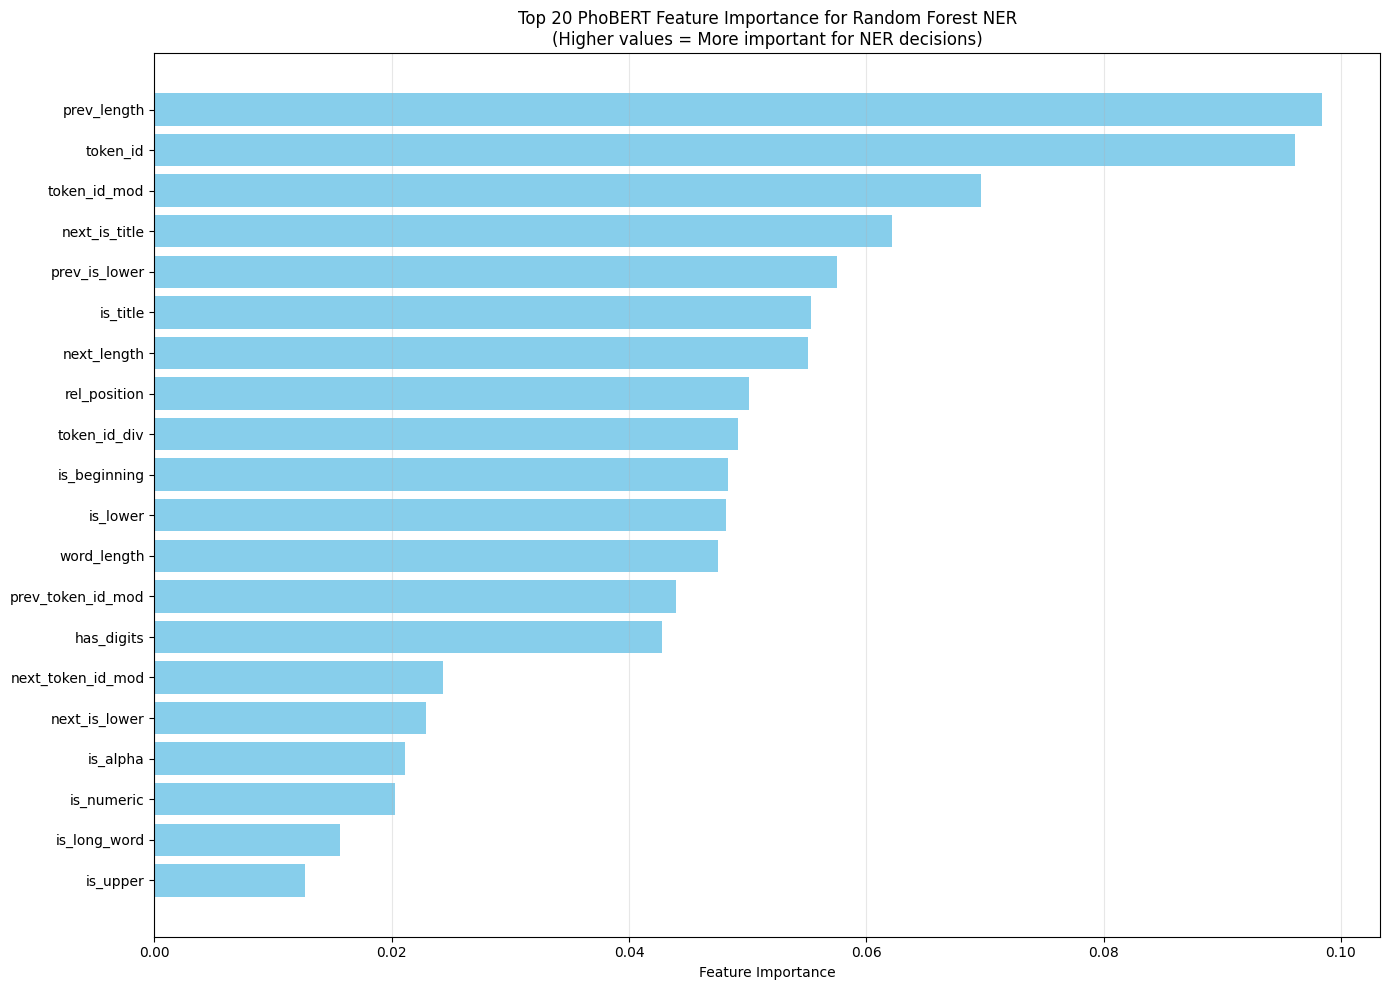

💡 INSIGHTS FROM FEATURE IMPORTANCE:
   • Most important feature: prev_length
   • PhoBERT token features rank: [np.int64(2), np.int64(3), np.int64(9), np.int64(13), np.int64(15), np.int64(21)]
   • Vietnamese patterns contribute: 1.2% of total importance
   • Context features (prev/next) contribute: 10.5%


In [49]:
# PhoBERT Feature Importance Analysis
# ===========================================

print("🔍 Analyzing PhoBERT feature importance...")
print("This shows which features are most valuable for NER decisions")
print()

# Define feature names with detailed descriptions
phobert_feature_names = [
    # Basic word features (1-8) + 5
    'is_title', 'is_lower', 'is_upper', 'is_digit', 'is_alpha', 'word_length',
    'is_long_word', 'is_short_word',

    # PhoBERT tokenizer features (9-12)
    'token_id', 'token_id_mod', 'token_id_div', 'subtoken_count',

    # Vietnamese-specific features (13-22) + 3
    'starts_Ng', 'starts_Tr', 'starts_Lê', 'starts_Phạm', 'starts_Vũ', 'starts_Phan', 'starts_Trương', 'starts_Bùi', 'starts_Đặng'
    'ends_nh', 'ends_ại', 'ends_ương', 'has_Thành', 'has_phố', 'has_tỉnh', 'has_quận', 'has_huyện', 'has_xã',

    # Position and context features (23-26)
    'abs_position', 'rel_position', 'is_beginning', 'is_end',

    # Previous token context (27-30)
    'prev_is_title', 'prev_is_lower', 'prev_token_id_mod', 'prev_length',

    # Next token context (31-34)
    'next_is_title', 'next_is_lower', 'next_token_id_mod', 'next_length',

    # Character-level features (35-40) => 48
    'has_digits', 'has_hyphen', 'has_period', 'has_comma', 'underscore_count', 'is_numeric'
]

# Get feature importance from trained model
phobert_importances = phobert_rf_model.feature_importances_[0:47]   # ??? How the FUCK is there 1 extra dimension

# Create feature importance DataFrame
phobert_feature_importance_df = pd.DataFrame({
    'feature': phobert_feature_names,
    'importance': phobert_importances,
    'rank': range(1, len(phobert_feature_names) + 1)
}).sort_values('importance', ascending=False)

# Reset rank after sorting
phobert_feature_importance_df['rank'] = range(1, len(phobert_feature_importance_df) + 1)

print("🏆 TOP 15 MOST IMPORTANT PHOBERT FEATURES:")
print("=" * 70)
for i, row in phobert_feature_importance_df.head(15).iterrows():
    print(f"{row['rank']:2d}. {row['feature']:20s} | {row['importance']:.4f} | {row['importance']*100:.1f}%")
print("=" * 70)
print()

# Analyze feature categories
print("📊 FEATURE CATEGORY ANALYSIS:")
category_importance = {
    'Basic Word Features': phobert_importances[0:8].sum(),
    'PhoBERT Features': phobert_importances[8:12].sum(),
    'Vietnamese Patterns': phobert_importances[12:22].sum(),
    'Position/Context': phobert_importances[22:26].sum(),
    'Previous Token': phobert_importances[26:30].sum(),
    'Next Token': phobert_importances[30:34].sum(),
    'Character Patterns': phobert_importances[34:40].sum()
}

for category, importance in sorted(category_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"   • {category:20s}: {importance:.4f} ({importance*100:.1f}%)")
print()

# Create visualization
plt.figure(figsize=(14, 10))
top_features = phobert_feature_importance_df.head(20)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 PhoBERT Feature Importance for Random Forest NER\n(Higher values = More important for NER decisions)')
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

print("💡 INSIGHTS FROM FEATURE IMPORTANCE:")
print(f"   • Most important feature: {phobert_feature_importance_df.iloc[0]['feature']}")
print(f"   • PhoBERT token features rank: {list(phobert_feature_importance_df[phobert_feature_importance_df['feature'].str.contains('token')]['rank'].values)}")
print(f"   • Vietnamese patterns contribute: {category_importance['Vietnamese Patterns']*100:.1f}% of total importance")
print(f"   • Context features (prev/next) contribute: {(category_importance['Previous Token'] + category_importance['Next Token'])*100:.1f}%")

In [46]:
# CELL 7: PhoBERT Random Forest Prediction Function
# ================================================

def predict_ner_with_phobert_rf(sentence_tokens, model, tokenizer):
    """
    PREDICTION FUNCTION: Predict NER tags for new sentences

    Process:
    1. For each token in the sentence, extract PhoBERT-enhanced features
    2. Use the same feature extraction as training (40 features)
    3. Apply the trained Random Forest model
    4. Return predicted NER tags

    Input:
    - sentence_tokens: List of tokens ["Nguyễn", "Văn", "A", "sống", "ở", "Hà", "Nội"]
    - model: Trained PhoBERT Random Forest model
    - tokenizer: PhoBERT tokenizer

    Output:
    - List of predicted NER tags ["B-PER", "I-PER", "I-PER", "O", "O", "B-LOC", "I-LOC"]
    """
    sentence_length = len(sentence_tokens)
    predictions = []

    print(f"🔮 Predicting NER tags for {sentence_length} tokens...")

    for pos, token in enumerate(sentence_tokens):
        # Get context tokens (previous and next)
        prev_token = sentence_tokens[pos-1] if pos > 0 else None
        next_token = sentence_tokens[pos+1] if pos < len(sentence_tokens)-1 else None

        # Get PhoBERT token ID for this token
        token_ids = tokenizer.encode(token, add_special_tokens=False)
        main_token_id = token_ids[0] if token_ids else 0

        # Extract the same 40 features used in training
        word_features = extract_phobert_token_features(
            token=token,
            label=None,  # We don't know the true label when predicting
            token_id=main_token_id,
            position=pos,
            sentence_length=sentence_length,
            prev_token=prev_token,
            next_token=next_token,
            tokenizer=tokenizer
        )

        # Make prediction using trained model
        # model.predict expects 2D array, so we wrap in list: [word_features]
        pred_tag = model.predict([word_features])[0]
        predictions.append(pred_tag)

    return predictions

print("✅ PhoBERT prediction function created")
print()

# Test the prediction function with multiple samples
print("🧪 TESTING PHOBERT PREDICTION FUNCTION:")
print("=" * 60)

# Test with different sample indices to show variety
test_indices = [5, 10, 15, 25]

for i, sample_idx in enumerate(test_indices):
    print(f"\n📝 Test Case {i+1} (Sentence {sample_idx}):")

    sample_tokens = df.iloc[sample_idx]['tokens']
    sample_true_tags = df.iloc[sample_idx]['ner_labels']

    # Make prediction
    sample_phobert_pred = predict_ner_with_phobert_rf(sample_tokens, phobert_rf_model, tokenizer)

    print(f"   Tokens:     {sample_tokens}")
    print(f"   True tags:  {sample_true_tags}")
    print(f"   Predicted:  {sample_phobert_pred}")

    # Calculate accuracy for this sample
    sample_accuracy = sum(t == p for t, p in zip(sample_true_tags, sample_phobert_pred)) / len(sample_true_tags)
    print(f"   Accuracy:   {sample_accuracy:.2%}")

    # Show which predictions were correct/incorrect
    correct_predictions = ["✓" if t == p else "✗" for t, p in zip(sample_true_tags, sample_phobert_pred)]
    print(f"   Match:      {correct_predictions}")

print("\n" + "=" * 60)
print("💡 PREDICTION INSIGHTS:")
print("   • Each token gets 40 PhoBERT-enhanced features")
print("   • Model considers context (previous/next tokens)")
print("   • Vietnamese-specific patterns help with person/place names")
print("   • PhoBERT tokenization provides semantic understanding")

✅ PhoBERT prediction function created

🧪 TESTING PHOBERT PREDICTION FUNCTION:

📝 Test Case 1 (Sentence 5):
🔮 Predicting NER tags for 28 tokens...
   Tokens:     ['Cách' 'đây' 'hai' 'tháng' 'những' 'người' 'thợ' 'phía' 'nam' 'Hải_Vân'
 'đã' 'về' '"' 'đích' '"' 'với' 'chiều' 'dài' 'hầm' 'hơn' '4.800' 'm' '('
 'chính' 'và' 'phụ' ')' '.']
   True tags:  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
   Predicted:  [np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('B-LOC'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O'), np.str_('O')]
   Accuracy:   100.00%
   Match:      ['✓', '✓', '✓', '✓', '✓', '✓', '✓', '✓', '✓', '✓', '✓